# Sketchbook for galaxy plotter

Here you will find a quickly written program to handle galaxy data, from download to encode.

You will need to install mw_plot, make sure to load a proper environment and then follow the instr



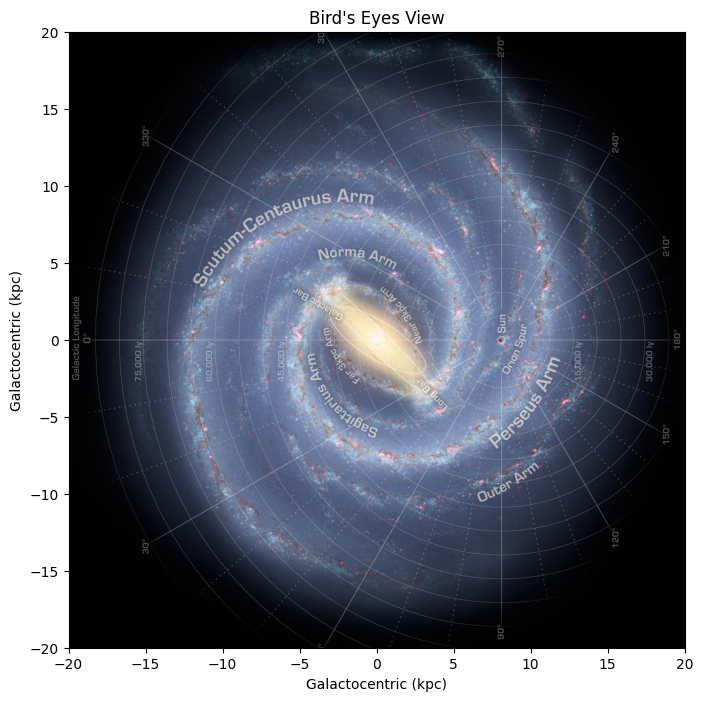

In [5]:
#Task 1: Install the git package and reproduce the image of the milky way via MWSkyMap (see attached code).
import numpy as np
from astropy import units as u
from mw_plot import MWFaceOn

mw1 = MWFaceOn(
    radius=20 * u.kpc,
    unit=u.kpc,
    coord="galactocentric",
    annotation=True,
    figsize=(10, 8),
)

mw1.title = "Bird's Eyes View"

mw1.scatter(8 * u.kpc, 0 * u.kpc, c="r", s=2)

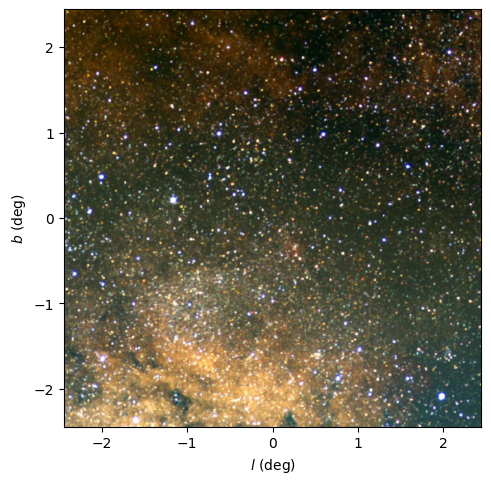

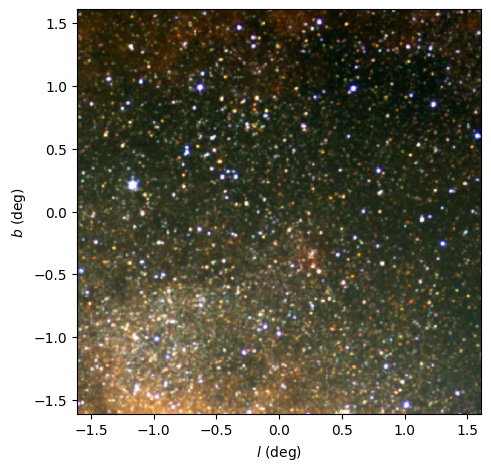

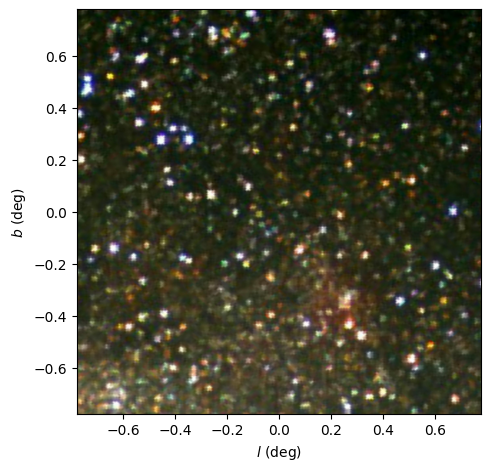

In [6]:
#Task 2: Generate a few (at least three in total) visualizations of the milky way sector starting in different centers (try "M31") and with different radius (be careful on the units!).
import matplotlib.pyplot as plt
from astropy import units as u
from mw_plot import MWSkyMap

mw1 = MWSkyMap(
    #center="M31",
    radius=(8800, 8800) * u.arcsec,
    background="Mellinger color optical survey",
)
fig, ax = plt.subplots(figsize=(5, 5))
mw1.transform(ax)
mw1.savefig('galaxy_large.png')

mw2 = MWSkyMap(
    #center="",
    radius=(5800, 5800) * u.arcsec,
    background="Mellinger color optical survey",
)
fig, ax = plt.subplots(figsize=(5, 5))
mw2.transform(ax)
mw2.savefig('galaxy_medium.png')

mw3 = MWSkyMap(
    #center="",
    radius=(2800, 2800) * u.arcsec,
    background="Mellinger color optical survey",
)
fig, ax = plt.subplots(figsize=(5, 5))
mw3.transform(ax)
mw3.savefig('galaxy_small.png')
plt.show()



Shape: (500, 500, 3)
Data type: uint8


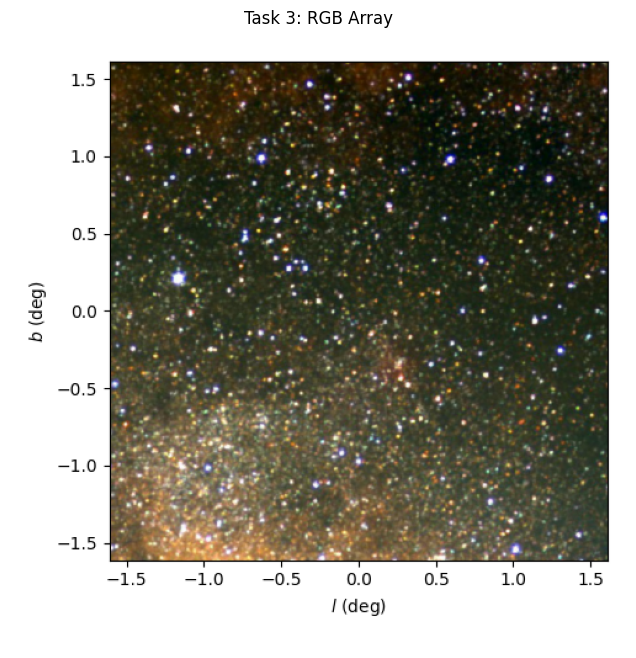

In [7]:
# Task 3: Convert the image generated into a rgb np.array (each pixel will be a list of 3 number, Red, Green, Blue (rbg).
from PIL import Image

def image_to_rgb_array(image_path):
    """
    A function to load an image file and convert it to RGB np.array
    
    Input
    -----
    image_path: str
        Path to the image file
        
    Output
    ------
    np.array(h, w, 3): A 3d map of each pixel in RGB encoding
    """
    img = Image.open(image_path)
    rgb_array = np.array(img)
    
    # If image has alpha channel (RGBA), take only RGB
    if len(rgb_array.shape) == 3 and rgb_array.shape[2] == 4:
        rgb_array = rgb_array[:, :, :3]
    
    return rgb_array

# Use the function
rgb_array = image_to_rgb_array('galaxy_medium.png')
print(f"Shape: {rgb_array.shape}")
print(f"Data type: {rgb_array.dtype}")

# Verify it loaded correctly
plt.figure(figsize=(8, 8))
plt.imshow(rgb_array)
plt.title('Task 3: RGB Array')
plt.axis('off')
plt.show()

Task 4: Ideate, describe in words and generate a set of categories from the task 3 data (e.g. red? 
Grey? ). This is your encoding

Bildet viser stjerner med forskjellige farger. Men felles for alle farger kommer fra RGB, vi kan dele verdiene inn i disse 3 kategoriene.
Gjør om hver piksel i bildet og sjekk hvilken farge den tilhører.



In [8]:
# Task 4
def categorize_pixels(rgb_array):
    """
    Kategoriser piksler som rød, grønn eller blå
    """
    h, w, _ = rgb_array.shape
    categories = np.zeros((h, w), dtype=int)

    for i in range(h):
        for j in range(w):
            r, g, b = rgb_array[i, j]
            
            if r > g and r > b:
                categories[i, j] = 0
            elif g > r and g > b:
                categories[i, j] = 1
            elif b > r and b > g:
                categories[i, j] = 2
    
    return categories

# rgb_array fra Task 3
categories = categorize_pixels(rgb_array)
print(f"Kategori-shape: {categories.shape}")

Kategori-shape: (500, 500)


Cluster centers:
[[ 53.14986479  54.33547156  35.77376685]
 [254.21329057 254.16075792 254.08011465]
 [181.86148238 160.03803159 128.9691373 ]
 [ 28.31339339  30.43261952  14.5581387 ]
 [ 86.22692296  80.94731283  59.31168714]
 [129.39087351 111.96388049  83.43100629]]
Unique clusters: [0 1 2 3 4 5]
Cluster distribution: [47896 85119  8165 55273 33334 20213]


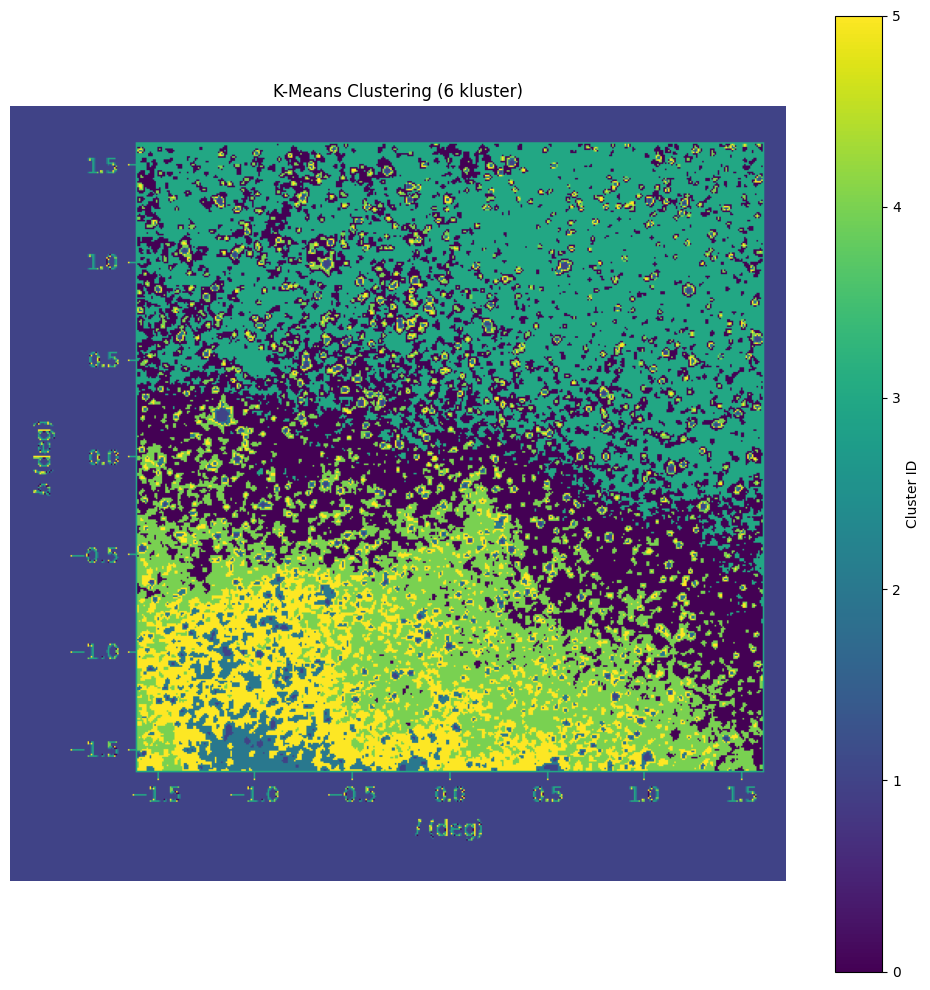

In [10]:
# Task 5: Use K-NN (Nearest neighbor, not discussed in class but extremely simple) or K-means to cluster the data
from sklearn.cluster import KMeans
import numpy as np

h, w, _ = rgb_array.shape
rgb_flat = rgb_array.reshape(-1, 3)

# Convert to float if needed
rgb_flat = rgb_flat.astype(np.float64)

# Apply K-means with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10, max_iter=300)
kmeans.fit(rgb_flat)
cluster_labels = kmeans.labels_
predicted_image = cluster_labels.reshape(h, w)

print(f"Cluster centers:\n{kmeans.cluster_centers_}")
print(f"Unique clusters: {np.unique(cluster_labels)}")
print(f"Cluster distribution: {np.bincount(cluster_labels)}")

# Visualize
plt.figure(figsize=(10, 10))
plt.imshow(predicted_image, cmap='viridis')
plt.title('K-Means Clustering (6 kluster)')
plt.colorbar(label='Cluster ID')
plt.axis('off')
plt.tight_layout()
plt.show()

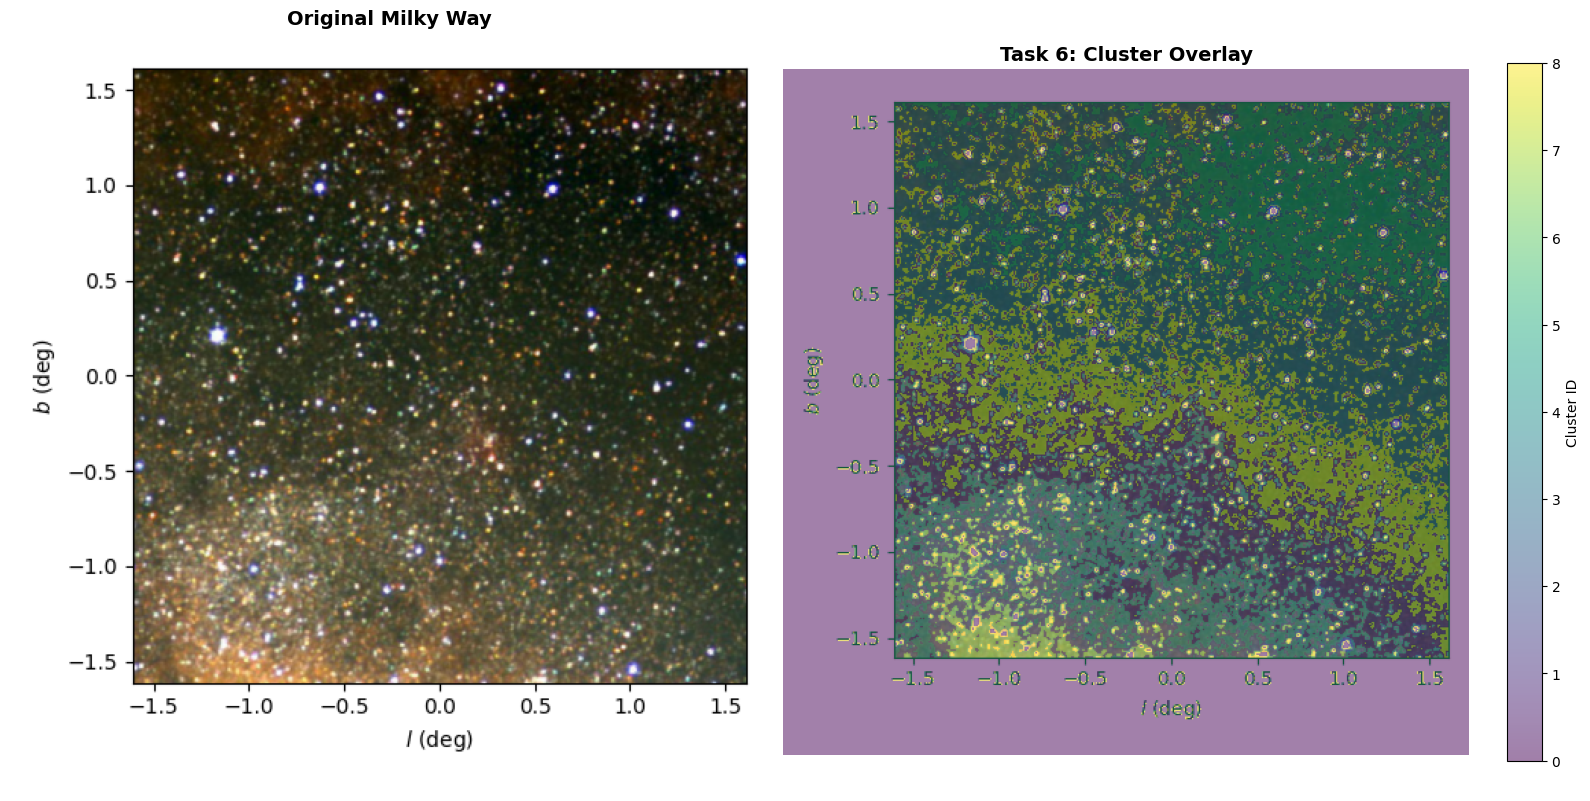

In [16]:
# Task 6: Over-impose your cluster to the image generated in task 2
import matplotlib.pyplot as plt

# Reuse the function to load the original image
rgb_array_task6 = image_to_rgb_array('galaxy_medium.png')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Original image
axes[0].imshow(rgb_array_task6)
axes[0].set_title('Original Milky Way', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Overlay
axes[1].imshow(rgb_array_task6)
axes[1].imshow(predicted_image, cmap='viridis', alpha=0.5)
axes[1].set_title('Task 6: Cluster Overlay', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.colorbar(axes[1].images[1], ax=axes[1], label='Cluster ID', fraction=0.046)
plt.tight_layout()
plt.savefig('task6_cluster_overlay.png', dpi=300, bbox_inches='tight')
plt.show()


Trying 3 clusters...
Trying 6 clusters...
Trying 9 clusters...


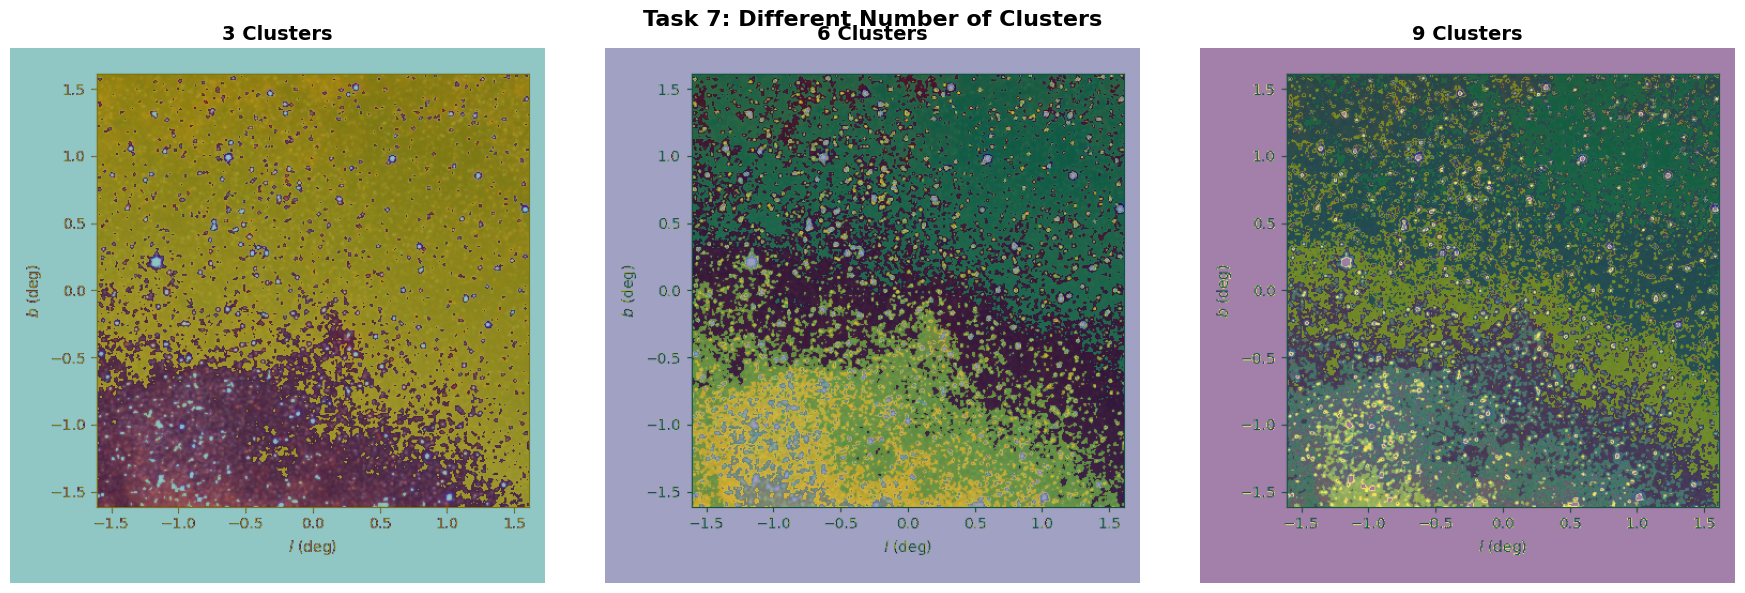

In [17]:
# Task 7: Where we repeat the tasks 5 and 6
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Function from Task 3
def image_to_rgb_array(image_path):
    from PIL import Image
    img = Image.open(image_path)
    rgb_array = np.array(img)
    if len(rgb_array.shape) == 3 and rgb_array.shape[2] == 4:
        rgb_array = rgb_array[:, :, :3]
    return rgb_array

# Load image
rgb_array = image_to_rgb_array('galaxy_medium.png')
h, w, _ = rgb_array.shape

# Try 3 different numbers of clusters
cluster_numbers = [3, 6, 9]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, n_clusters in enumerate(cluster_numbers):
    print(f"Trying {n_clusters} clusters...")
    
    # Task 5: K-means clustering
    rgb_flat = rgb_array.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(rgb_flat)
    predicted_image = kmeans.labels_.reshape(h, w)
    
    # Task 6: Overlay
    axes[idx].imshow(rgb_array)
    axes[idx].imshow(predicted_image, cmap='viridis', alpha=0.5)
    axes[idx].set_title(f'{n_clusters} Clusters', fontsize=14, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('Task 7: Different Number of Clusters', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('task7_comparison.png', dpi=300, bbox_inches='tight')
plt.show()    